In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime
import seaborn as sns

# Chapter 1: Dates and Calendars

In [2]:
two_hurricane_dates = [date(2016, 10, 7), date(2017, 6, 21)] # arguments to date() follow "biggest to smallest" i.e year, month, date
two_hurricane_dates

[datetime.date(2016, 10, 7), datetime.date(2017, 6, 21)]

## accessing components of a date

In [3]:
first_hurricane_year = two_hurricane_dates[0].year
print(f"The year component of this date is: {first_hurricane_year}")

first_hurricane_month = two_hurricane_dates[0].month
print(f"The month component of this date is: {first_hurricane_month}")

first_hurricane_day = two_hurricane_dates[0].day
print(f"The day component of this date is: {first_hurricane_day}")

first_hurricane_weekday = two_hurricane_dates[0].weekday()
print(f"The weekday element of this date is: {first_hurricane_weekday}")
# Weekdays start on Monday with value 0

The year component of this date is: 2016
The month component of this date is: 10
The day component of this date is: 7
The weekday element of this date is: 4


In [4]:
bike_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Dates_and_Times/capital-onebike.csv')
bike_data.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB


In [6]:
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])

In [7]:
bike_data['End date'] = pd.to_datetime(bike_data['End date'])


In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


## Counting up Dates

In [9]:
# Finding Start dates that were in January
counter = 0
for dates in bike_data['Start date']:
    if dates.month == 10:
        counter += 1
print(f"The total number of rides started in October was {counter}.")

The total number of rides started in October was 108.


In [10]:
bike_data['Start month'] = pd.DatetimeIndex(bike_data['Start date']).month
bike_data

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,10
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,10
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,10
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,10
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,10
...,...,...,...,...,...,...,...,...,...
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,12
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,12
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,12
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,12


/Users/joseservin/DataCamp/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


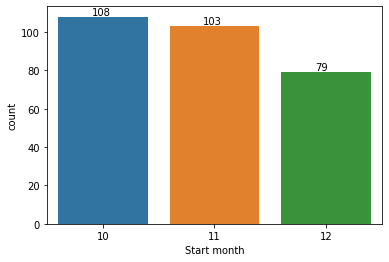

In [11]:
ax = sns.countplot(
    bike_data['Start month']
)
for p, label in zip(ax.patches, bike_data['Start month'].value_counts()):
    ax.annotate(label, (p.get_x()+0.30, p.get_height()+1))

## Dictionary map of counts

In [12]:
rides_each_month = {10:0, 11:0, 12:0}

for i in bike_data['Start month']:
    rides_each_month[i] += 1

rides_each_month

{10: 108, 11: 103, 12: 79}

## Math with Dates

In [13]:
d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)
l = [d1, d2]
min(l)

datetime.date(2017, 11, 5)

### Subtracting two dates

In [14]:
delta = d2 - d1
type(delta)

datetime.timedelta

In [15]:
# timedelta has a .days attribute that can be accessed to see number of days between dates
delta.days

29

### adding timedelta to date

In [16]:
td = timedelta(days=29)
arrived_d2 = d1 + td
arrived_d2

datetime.date(2017, 12, 4)

## Sorting dates

In [17]:
sorted_df = bike_data.sort_values('Start date', ascending=False)
sorted_df.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
289,2017-12-30 15:09:03,2017-12-30 15:19:13,31610,Eastern Market / 7th & North Carolina Ave SE,31272,Washington & Independence Ave SW/HHS,W20529,Member,12
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,12
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,12
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,12
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,12


## Turning dates into strings

* ISO 8601 Format follows YYYY-MM-DD

In [18]:
list_of_string_dates = [d2.isoformat(), d1.isoformat()]
list_of_string_dates

['2017-12-04', '2017-11-05']

In [19]:
sorted(list_of_string_dates)

['2017-11-05', '2017-12-04']

### strftime method "string format time"

* %Y - Year
* %m - month
* %d - day

In [20]:
d1.strftime('%Y') # argument passed is called a format string

'2017'

In [21]:
from IPython.core.display_functions import display

display(two_hurricane_dates[0].strftime("The year of the first entry in hurricanes list is %Y"))
two_hurricane_dates[1].strftime("The year of the second entry in hurricanes list is %Y")

'The year of the first entry in hurricanes list is 2016'

'The year of the second entry in hurricanes list is 2017'

### getting names of months from dates with %B

In [22]:
display(two_hurricane_dates[0].strftime("The name of the month for the first entry in hurricanes list is %B"))
two_hurricane_dates[1].strftime("The name of the month for the second entry in hurricanes list is %B")

'The name of the month for the first entry in hurricanes list is October'

'The name of the month for the second entry in hurricanes list is June'

### getting day of year from dates with %j

In [23]:
display(two_hurricane_dates[0].strftime("The day of year for the first entry in hurricanes list is %j"))
two_hurricane_dates[1].strftime("The day of year for the second entry in hurricanes list is %j")

'The day of year for the first entry in hurricanes list is 281'

'The day of year for the second entry in hurricanes list is 172'

# Chapter 2: Combining Dates and Times

In [26]:
my_datetime = datetime(2017, 10, 1, 15, 23, 25)
my_datetime

datetime.datetime(2017, 10, 1, 15, 23, 25)

## Replacing parts of a datetime

In [28]:
my_datetime_hrs = my_datetime.replace(minute=0, second=0)
my_datetime_hrs

datetime.datetime(2017, 10, 1, 15, 0)

## Counting events before and after noon

In [29]:
bike_data.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,10
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,10
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,10
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,10
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,10


In [30]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
 8   Start month           290 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 20.5+ KB


In [31]:
trip_count = {'AM':0, 'PM':0}

for i in bike_data['Start date']:
    if i.hour < 12:
        trip_count['AM'] += 1
    else:
        trip_count['PM'] += 1

trip_count

{'AM': 94, 'PM': 196}

## Printing and Parsing datetimes

In [36]:
last_ride = datetime(2017, 12, 30, 15, 19, 13)
last_ride

datetime.datetime(2017, 12, 30, 15, 19, 13)

In [38]:
last_ride.strftime('%Y-%m-%d')

'2017-12-30'

In [39]:
last_ride.strftime("%Y-%m-%d %H:%M:%S")

'2017-12-30 15:19:13'

In [40]:
last_ride.isoformat()

'2017-12-30T15:19:13'

## Parsing datetimes with strptime

In [47]:
parsed_datetime = datetime.strptime(
    '02/22/2022 13:30:14',
    '%m/%d/%Y %H:%M:%S'
)
parsed_datetime

datetime.datetime(2022, 2, 22, 13, 30, 14)

In [48]:
type(parsed_datetime)

datetime.datetime

In [50]:
print(parsed_datetime)

2022-02-22 13:30:14


## Handling Unix Timestamps

* represents the number of seconds since January 1st 1970

In [52]:
ts = 1514665153.0
ts_datetime = datetime.fromtimestamp(ts)
print(ts_datetime)

2017-12-30 14:19:13


## Working with Durations

In [53]:
start_date = datetime( 2017, 10, 8, 23, 46, 47)
end_date = datetime(2017, 10, 9, 0, 10, 57)

In [54]:
duration = end_date - start_date

In [56]:
print(duration)

0:24:10


In [57]:
print(duration.total_seconds())

1450.0


In [59]:
created_timedelta = timedelta(seconds=1)
print(start_date + created_timedelta)

2017-10-08 23:46:48


In [60]:
created_timedelta2 = timedelta(days=1, seconds=10)
print(start_date + created_timedelta2)

2017-10-09 23:46:57


## Getting duration of each trip

In [63]:
onebike_durations = []

for i in bike_data['Start date']:
    for j in bike_data['End date']:
        diff = j - i
        diff_seconds = diff.total_seconds()

        onebike_durations.append(diff_seconds)

onebike_durations

[181.0,
 8794.0,
 55168.0,
 64478.0,
 98500.0,
 100049.0,
 101300.0,
 102192.0,
 148142.0,
 183861.0,
 188923.0,
 190827.0,
 192825.0,
 229806.0,
 230309.0,
 257195.0,
 260484.0,
 263348.0,
 264214.0,
 266891.0,
 268036.0,
 319770.0,
 320780.0,
 321306.0,
 350907.0,
 356005.0,
 407676.0,
 419233.0,
 424189.0,
 427891.0,
 431161.0,
 434949.0,
 436566.0,
 437114.0,
 438338.0,
 505781.0,
 513820.0,
 515051.0,
 516086.0,
 551243.0,
 590999.0,
 596284.0,
 599668.0,
 603834.0,
 606396.0,
 608057.0,
 609113.0,
 634216.0,
 634906.0,
 636452.0,
 637995.0,
 639008.0,
 642288.0,
 643810.0,
 644775.0,
 683400.0,
 688530.0,
 690485.0,
 696133.0,
 779279.0,
 783622.0,
 787013.0,
 788146.0,
 791467.0,
 791983.0,
 793275.0,
 794909.0,
 803398.0,
 826557.0,
 832608.0,
 869869.0,
 925898.0,
 927385.0,
 944060.0,
 944692.0,
 944991.0,
 947792.0,
 1038976.0,
 1391893.0,
 1573550.0,
 1577172.0,
 1578238.0,
 1578822.0,
 1579587.0,
 1717979.0,
 1718328.0,
 1799171.0,
 1807699.0,
 1809188.0,
 1811354.0,
 1813

## Finding average trip length

In [64]:
total_time = sum(onebike_durations)
number_of_rides = len(onebike_durations)

avg_ride = total_time/number_of_rides
avg_ride

1178.9310344827586